# Zakhar Malov

## Research question/interests

What is the relation between Cost of Revenue and Total Revenue among companies?

## Task1 - EDA

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df = pd.read_csv('../data/raw/fundamentals.csv')

In [3]:
df.shape

(1781, 79)

In [4]:
df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [5]:
df.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [6]:
#Using Pearson Correlation
cor = df.corr()

In [7]:
#Correlation with "Total Revenue" variable
cor_target = abs(cor["Total Revenue"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

Cost of Revenue                     0.957385
Earnings Before Interest and Tax    0.700922
Earnings Before Tax                 0.704684
Gross Profit                        0.817326
Income Tax                          0.701421
Net Income-Cont. Operations         0.702299
Sales, General and Admin.           0.739824
Total Current Liabilities           0.768593
Total Revenue                       1.000000
Name: Total Revenue, dtype: float64

In [8]:
#Correlation with "Total Revenue" variable
irr_cor_target = abs(cor["Total Revenue"])#Selecting highly uncorrelated features
irrelevant_features = irr_cor_target[cor_target<0.7]
irrelevant_features

Unnamed: 0                      0.024759
Accounts Payable                0.542084
Accounts Receivable             0.069428
Add'l income/expense items      0.283123
After Tax ROE                   0.023004
                                  ...   
Total Liabilities & Equity      0.306483
Treasury Stock                  0.467346
For Year                        0.009180
Earnings Per Share              0.135986
Estimated Shares Outstanding    0.473148
Name: Total Revenue, Length: 68, dtype: float64

In [9]:
irrelevant_features_in_list=irrelevant_features.index.tolist()
irrelevant_features_in_list.remove('For Year') #we can need the year even if there are no correlation with this variable

In [10]:
df_cleaned = df.copy().drop(irrelevant_features_in_list, axis=1) #we take away all the variables that show low correlation

In [11]:
df_cleaned

,Ticker Symbol,Period Ending,Cost of Revenue,Earnings Before Interest and Tax,Earnings Before Tax,Gross Profit,Income Tax,Net Income-Cont. Operations,"Sales, General and Admin.",Total Current Liabilities,Total Revenue,For Year
0,AAL,2012-12-31,1.049900e+10,-1.813000e+09,-2.445000e+09,1.435600e+10,-5.690000e+08,-4.084000e+09,1.297700e+10,9.011000e+09,2.485500e+10,2012.0
1,AAL,2013-12-31,1.101900e+10,-1.324000e+09,-2.180000e+09,1.572400e+10,-3.460000e+08,-4.489000e+09,1.291300e+10,1.380600e+10,2.674300e+10,2013.0
2,AAL,2014-12-31,1.562000e+10,4.099000e+09,3.212000e+09,2.703000e+10,3.300000e+08,2.882000e+09,2.068600e+10,1.340400e+10,4.265000e+10,2014.0
3,AAL,2015-12-31,1.109600e+10,5.496000e+09,4.616000e+09,2.989400e+10,-2.994000e+09,7.610000e+09,2.127500e+10,1.360500e+10,4.099000e+10,2015.0
4,AAP,2012-12-29,3.106967e+09,6.579150e+08,6.240740e+08,3.098036e+09,2.364040e+08,3.876700e+08,2.440721e+09,2.559638e+09,6.205003e+09,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1776,ZION,2015-12-31,4.934400e+07,5.207260e+08,4.518590e+08,0.000000e+00,1.423880e+08,3.094710e+08,1.591239e+09,0.000000e+00,2.210591e+09,2015.0
1777,ZTS,2013-12-31,1.669000e+09,8.030000e+08,6.900000e+08,2.892000e+09,1.870000e+08,5.040000e+08,1.613000e+09,1.415000e+09,4.561000e+09,2013.0
1778,ZTS,2014-12-31,1.717000e+09,9.370000e+08,8.200000e+08,3.068000e+09,2.330000e+08,5.830000e+08,1.643000e+09,1.086000e+09,4.785000e+09,2014.0
1779,ZTS,2015-12-31,1.738000e+09,6.690000e+08,5.450000e+08,3.027000e+09,2.060000e+08,3.390000e+08,1.532000e+09,1.781000e+09,4.765000e+09,2015.0


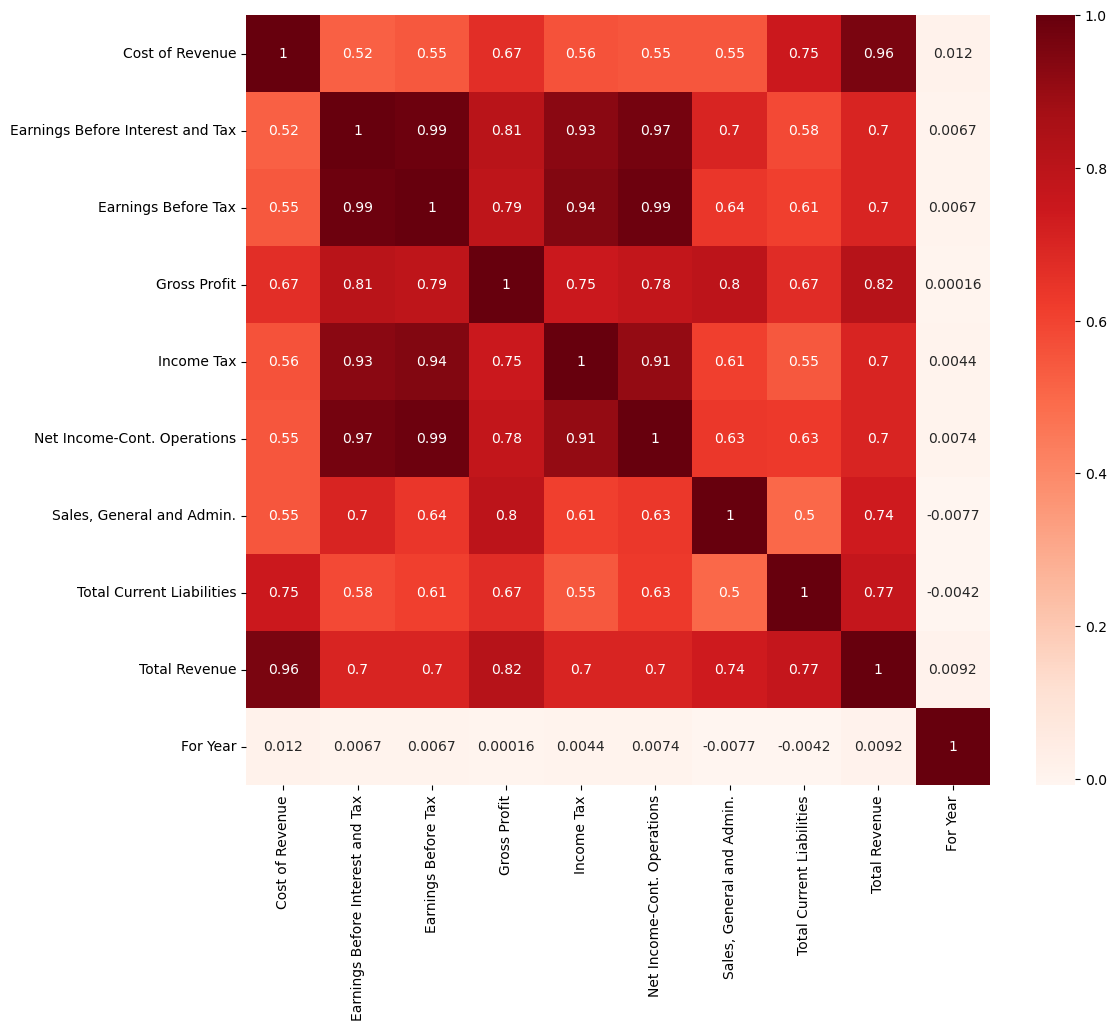

In [12]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cleaned_cor = df_cleaned.corr()
sns.heatmap(cleaned_cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
df_cleaned = df_cleaned.dropna(axis=0) #take away inavailable data
df_cleaned.shape

(1608, 12)

In [14]:
df_cleaned.columns

Index(['Ticker Symbol', 'Period Ending', 'Cost of Revenue',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Gross Profit', 'Income Tax', 'Net Income-Cont. Operations',
       'Sales, General and Admin.', 'Total Current Liabilities',
       'Total Revenue', 'For Year'],
      dtype='object')

<AxesSubplot:xlabel='Total Revenue', ylabel='Sales, General and Admin.'>

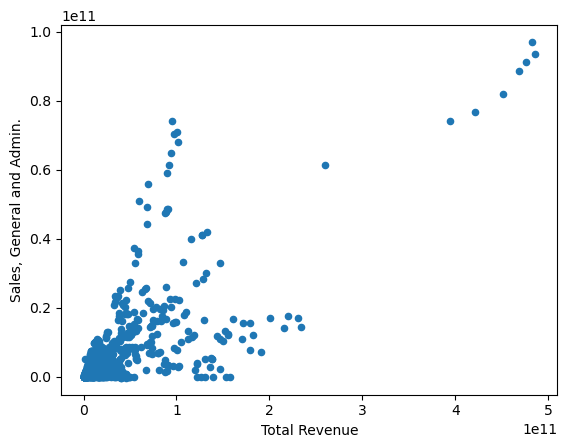

In [15]:
df_cleaned.plot(kind='scatter', x='Total Revenue', y='Sales, General and Admin.')

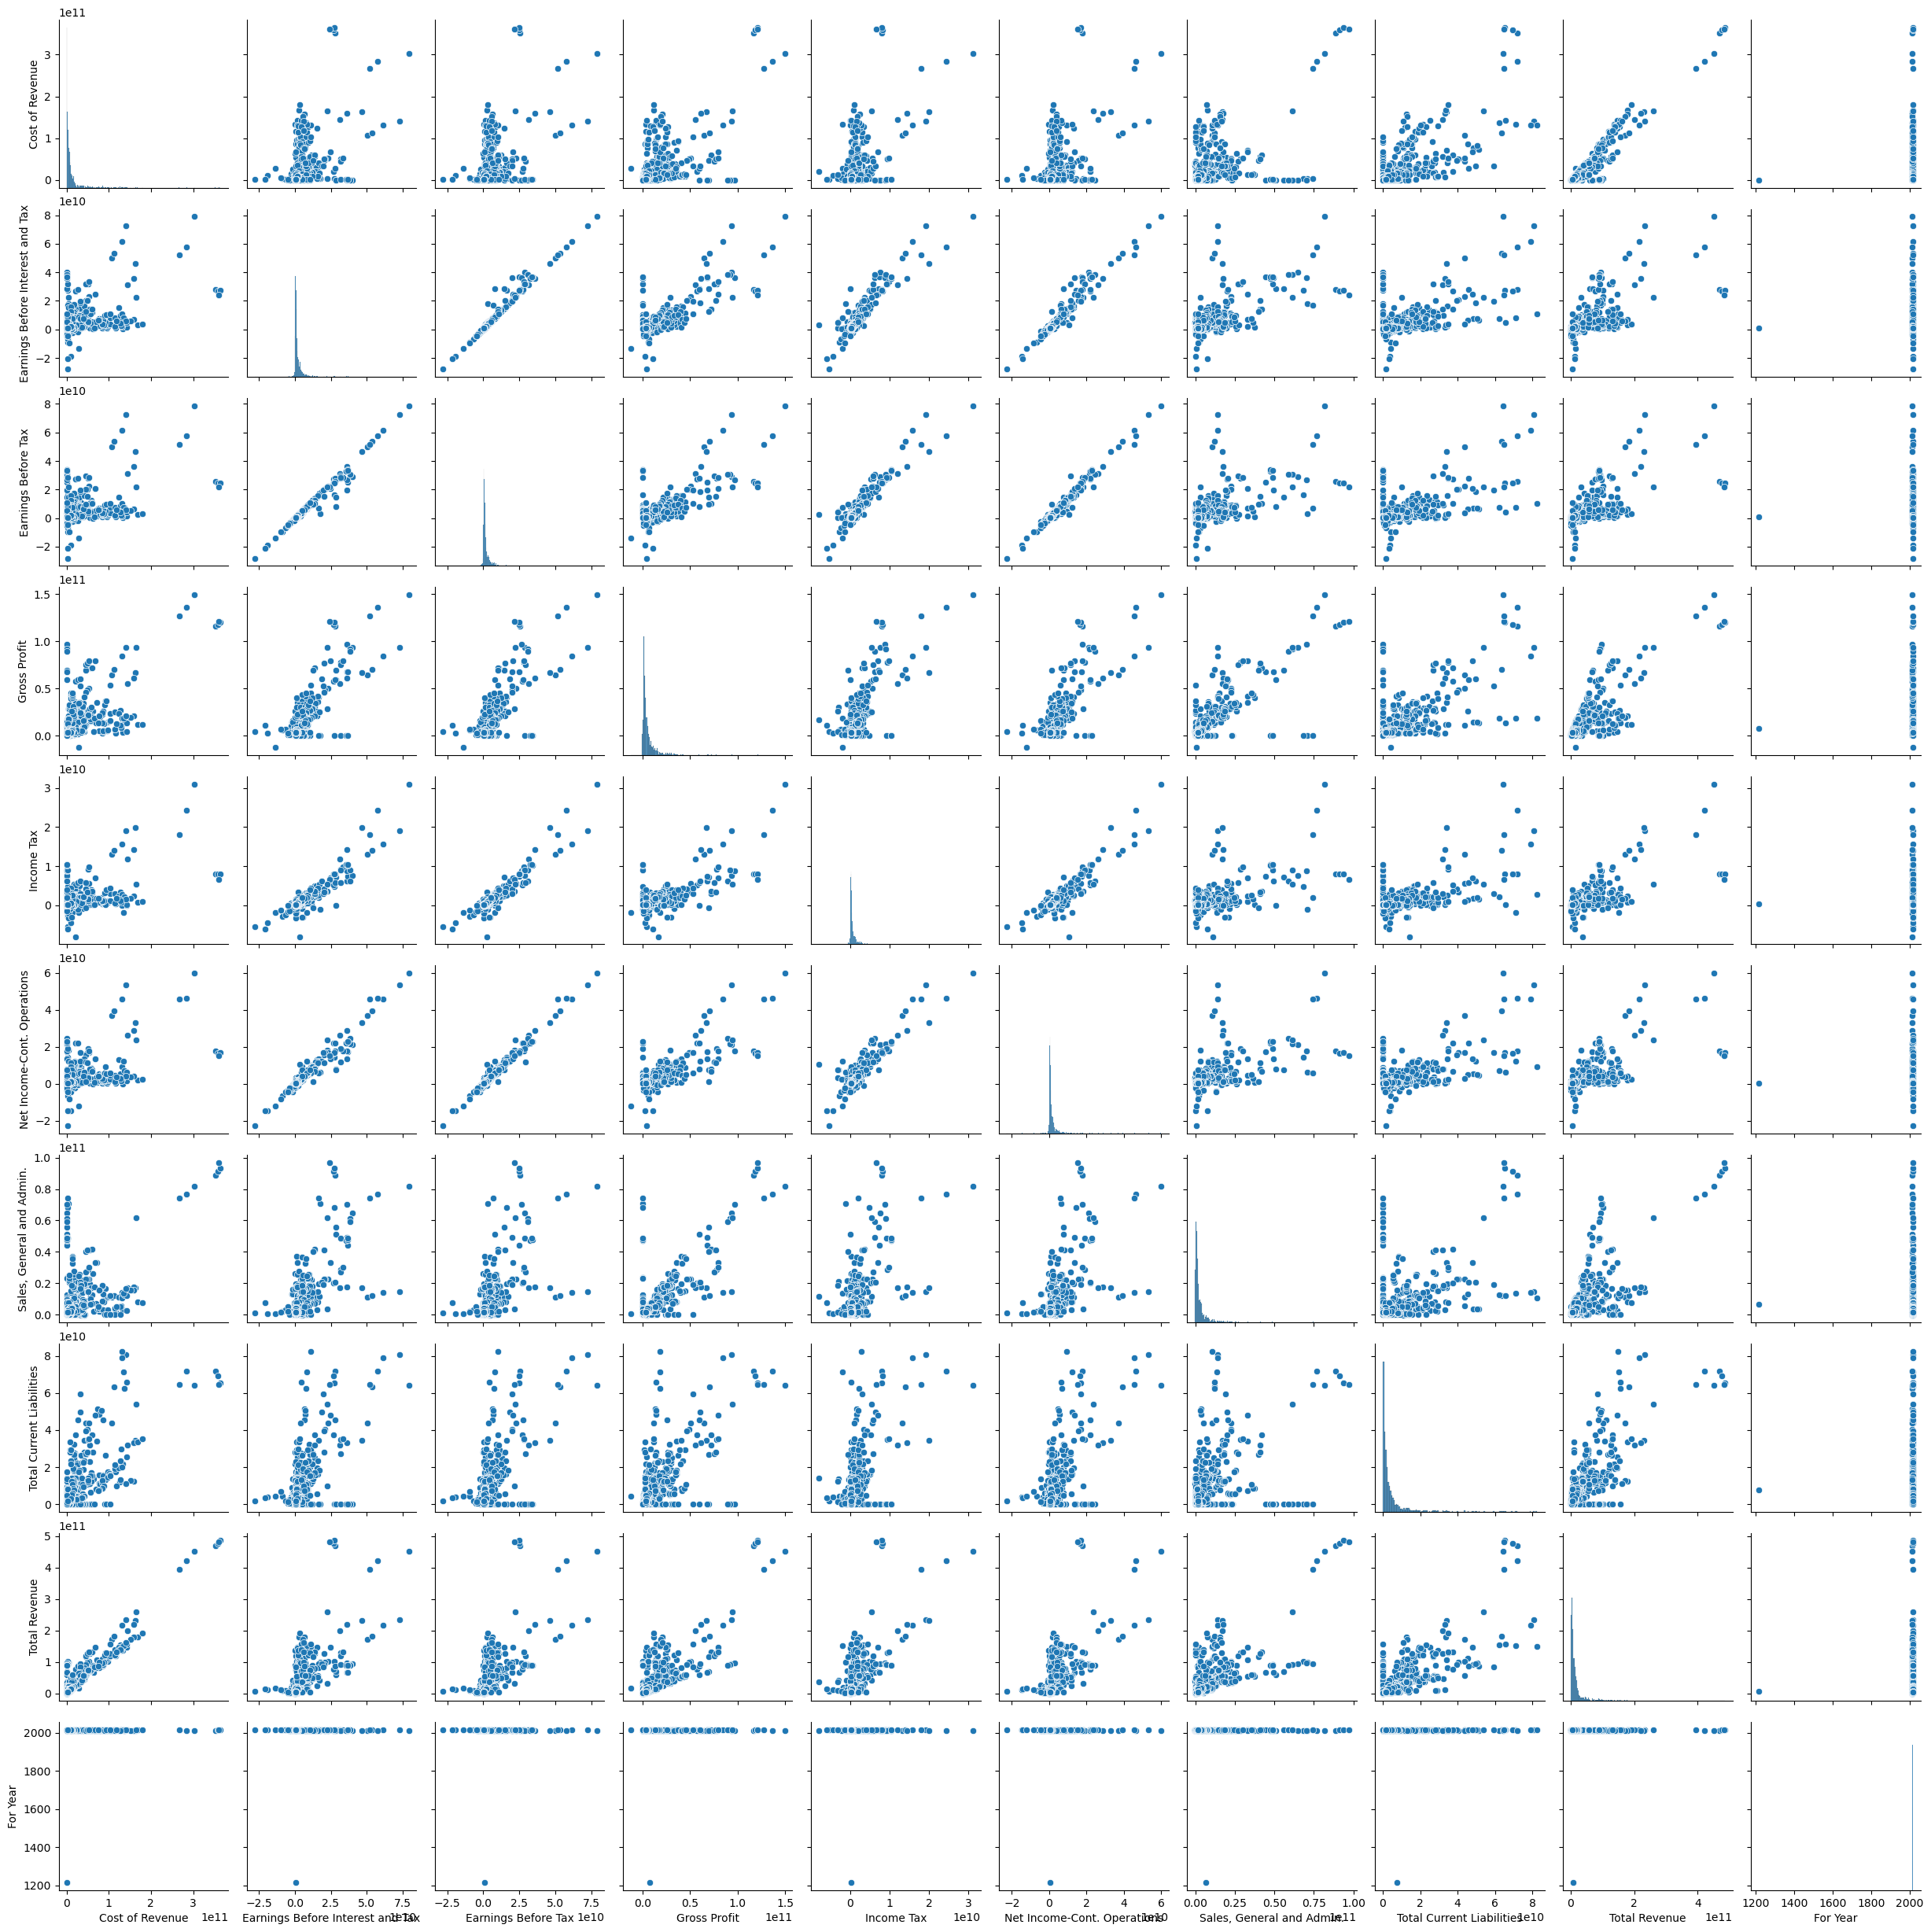

In [16]:
sns.pairplot(df_cleaned) #looking for the general dependencies

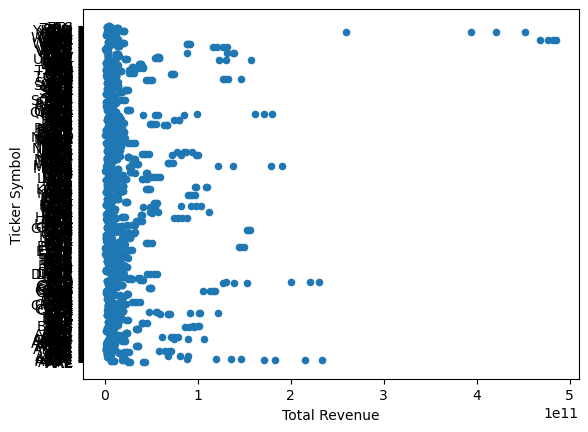

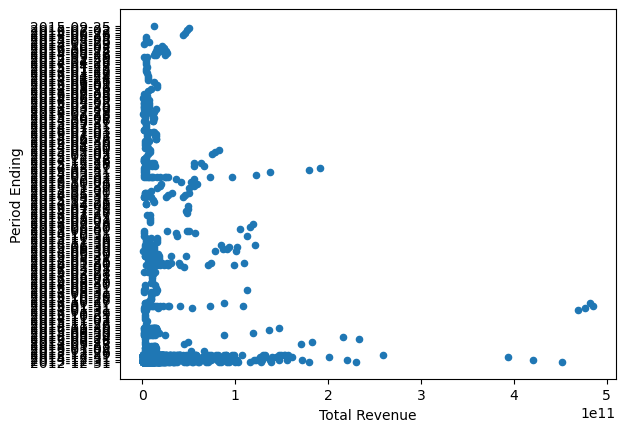

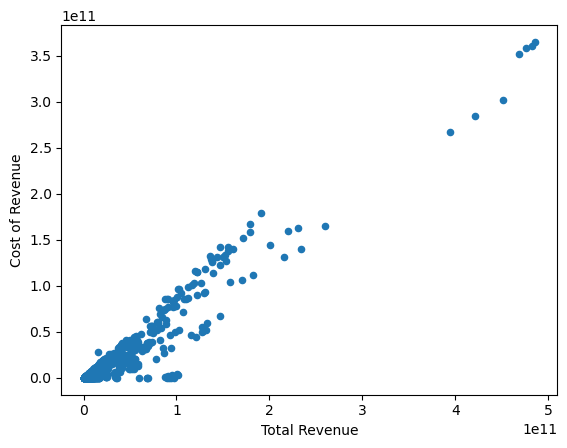

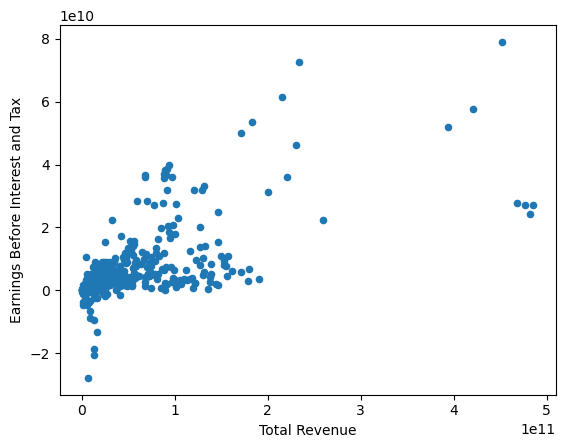

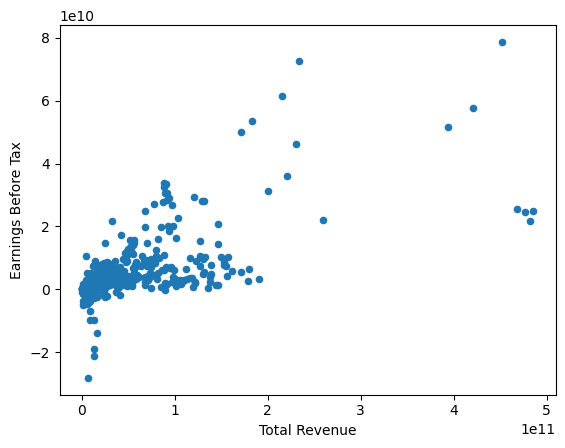

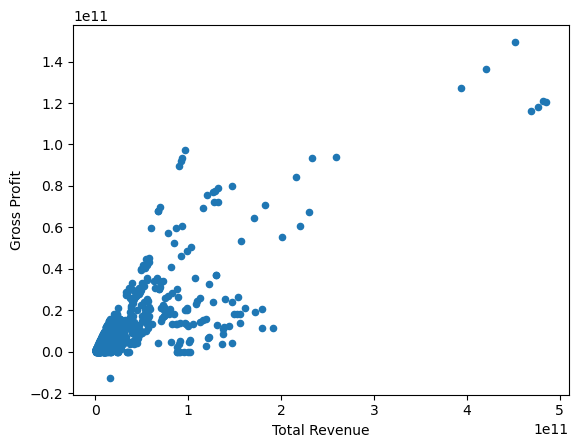

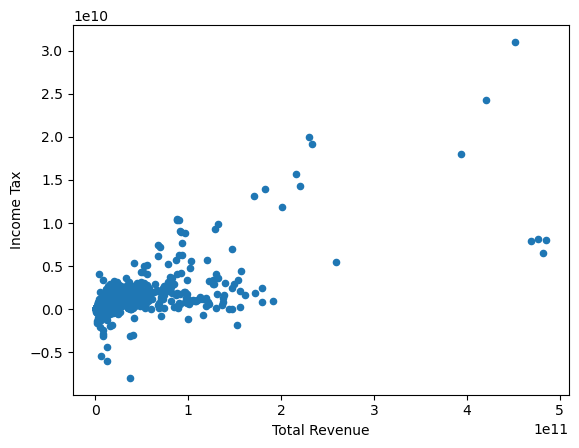

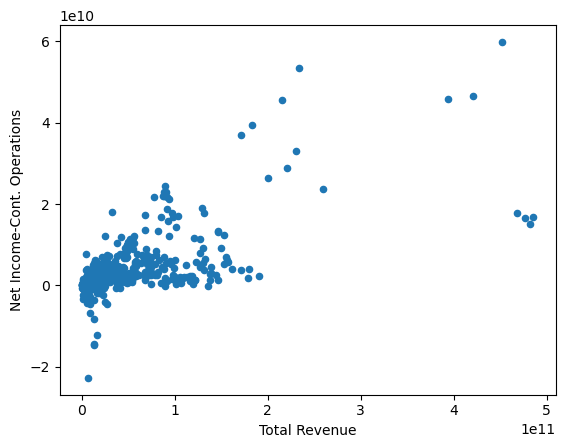

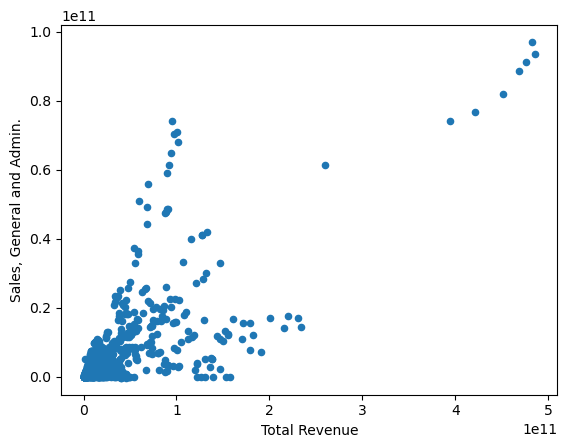

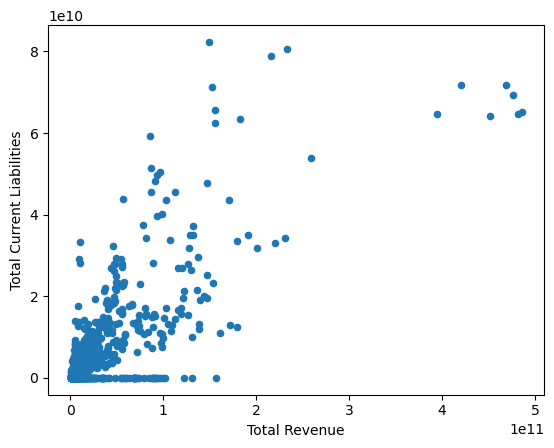

In [17]:
#For now we are looking only for studied variable, 'Total Revenue'

relevant_features_in_list=df_cleaned.columns.tolist()
relevant_features_in_list.remove('For Year') #here there are no correlation
relevant_features_in_list.remove('Total Revenue') #we don't need to compare with the same

for a in relevant_features_in_list:
    df_cleaned.plot(kind='scatter', x='Total Revenue', y=a)

In [18]:
years = np.array(df_cleaned['For Year'])
print(years.min(), years.max())

1215.0 2016.0


In [19]:
#we've seen that there is a strange year appeared, we'll take away outliers
years_low, years_hgh = np.percentile(years, [0.001, 100])
print(years_low, years_hgh)

1227.80779 2016.0


In [20]:
df_cleaned = df_cleaned[df_cleaned['For Year'].between(2011, 2017)]

In [21]:
years_bins = np.linspace(2012, 2016, 6)

<AxesSubplot:ylabel='Frequency'>

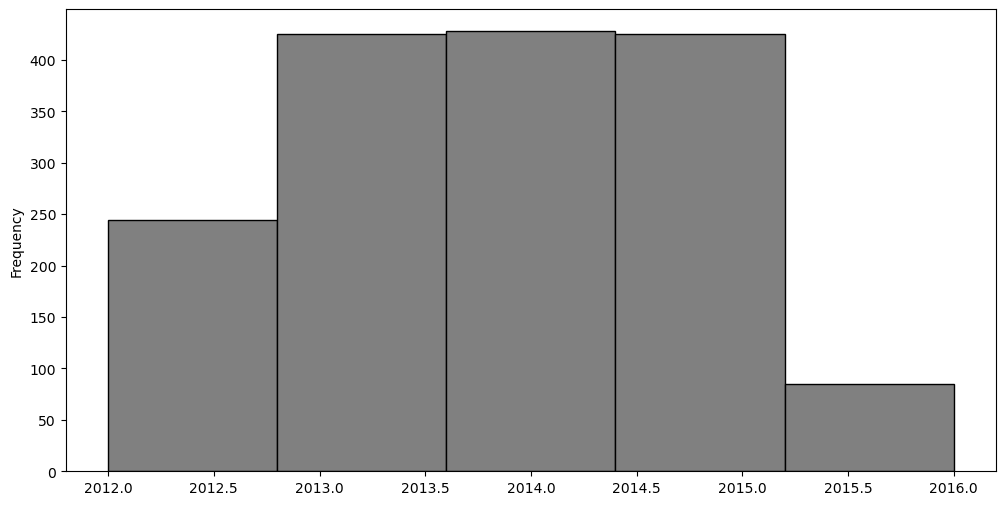

In [22]:
df_cleaned['For Year'].plot(kind='hist', bins=years_bins, figsize=(12,6), facecolor='grey',edgecolor='black')

In [23]:
df_cleaned.shape

(1607, 12)

In [24]:
#We consider Task 1 finished, we save the pre-cleaned data to separate file

df_cleaned.to_csv('CleanedFundamentals.csv') 

## Task2 - Analysis Pipeline

In [25]:
df = pd.read_csv('CleanedFundamentals.csv')

In [26]:
df.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Cost of Revenue',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Gross Profit', 'Income Tax', 'Net Income-Cont. Operations',
       'Sales, General and Admin.', 'Total Current Liabilities',
       'Total Revenue', 'For Year'],
      dtype='object')

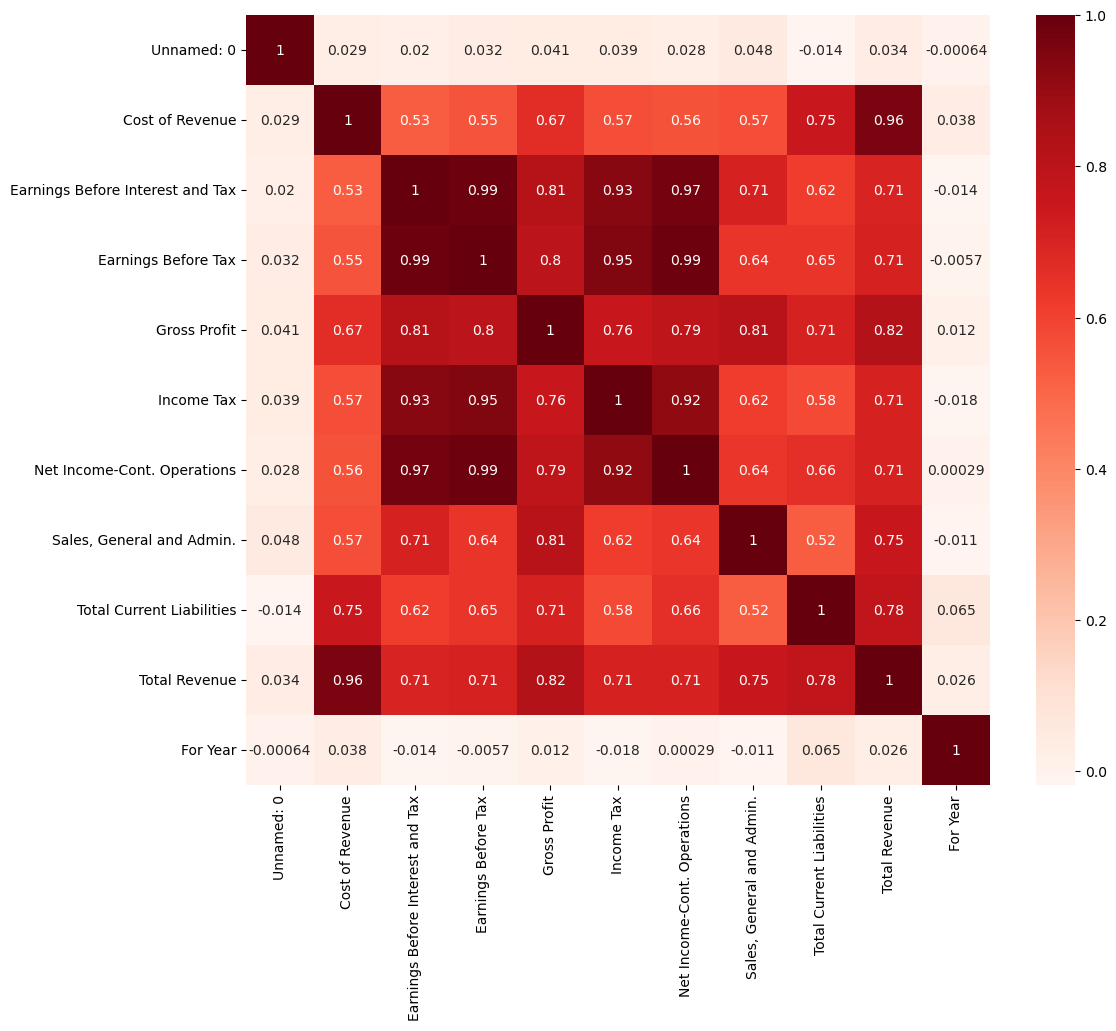

In [27]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
df_cleaned = df.copy().drop('Unnamed: 0', axis=1)

In [29]:
df_cleaned = df_cleaned.copy().drop('Net Income-Cont. Operations', axis=1)

In [30]:
df_cleaned.head()

,Ticker Symbol,Period Ending,Cost of Revenue,Earnings Before Interest and Tax,Earnings Before Tax,Gross Profit,Income Tax,"Sales, General and Admin.",Total Current Liabilities,Total Revenue,For Year
0,AAL,2012-12-31,1.049900e+10,-1.813000e+09,-2.445000e+09,1.435600e+10,-5.690000e+08,1.297700e+10,9.011000e+09,2.485500e+10,2012.0
1,AAL,2013-12-31,1.101900e+10,-1.324000e+09,-2.180000e+09,1.572400e+10,-3.460000e+08,1.291300e+10,1.380600e+10,2.674300e+10,2013.0
2,AAL,2014-12-31,1.562000e+10,4.099000e+09,3.212000e+09,2.703000e+10,3.300000e+08,2.068600e+10,1.340400e+10,4.265000e+10,2014.0
3,AAL,2015-12-31,1.109600e+10,5.496000e+09,4.616000e+09,2.989400e+10,-2.994000e+09,2.127500e+10,1.360500e+10,4.099000e+10,2015.0
4,AAP,2012-12-29,3.106967e+09,6.579150e+08,6.240740e+08,3.098036e+09,2.364040e+08,2.440721e+09,2.559638e+09,6.205003e+09,2012.0


In [31]:
df_cleaned['Period Ending']

0       2012-12-31
1       2013-12-31
2       2014-12-31
3       2015-12-31
4       2012-12-29
           ...    
1602    2014-12-31
1603    2015-12-31
1604    2013-12-31
1605    2014-12-31
1606    2015-12-31
Name: Period Ending, Length: 1607, dtype: object

In [32]:
periods = np.array(df_cleaned['Period Ending'])

In [33]:
from datetime import datetime

In [34]:
datetimeforperiods=[]
for period in periods:
    date_time_obj = datetime.strptime(period, '%Y-%m-%d')
    datetimeforperiods.append(date_time_obj)

In [35]:
dates = np.array(datetimeforperiods)

In [36]:
dates.max()

datetime.datetime(2016, 10, 31, 0, 0)

In [37]:
df_cleaned['PeriodEndingInDate'] = dates.tolist()

In [38]:
df_cleaned

,Ticker Symbol,Period Ending,Cost of Revenue,Earnings Before Interest and Tax,Earnings Before Tax,Gross Profit,Income Tax,"Sales, General and Admin.",Total Current Liabilities,Total Revenue,For Year,PeriodEndingInDate
0,AAL,2012-12-31,1.049900e+10,-1.813000e+09,-2.445000e+09,1.435600e+10,-5.690000e+08,1.297700e+10,9.011000e+09,2.485500e+10,2012.0,2012-12-31
1,AAL,2013-12-31,1.101900e+10,-1.324000e+09,-2.180000e+09,1.572400e+10,-3.460000e+08,1.291300e+10,1.380600e+10,2.674300e+10,2013.0,2013-12-31
2,AAL,2014-12-31,1.562000e+10,4.099000e+09,3.212000e+09,2.703000e+10,3.300000e+08,2.068600e+10,1.340400e+10,4.265000e+10,2014.0,2014-12-31
3,AAL,2015-12-31,1.109600e+10,5.496000e+09,4.616000e+09,2.989400e+10,-2.994000e+09,2.127500e+10,1.360500e+10,4.099000e+10,2015.0,2015-12-31
4,AAP,2012-12-29,3.106967e+09,6.579150e+08,6.240740e+08,3.098036e+09,2.364040e+08,2.440721e+09,2.559638e+09,6.205003e+09,2012.0,2012-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...
1602,ZION,2014-12-31,4.973600e+07,7.446850e+08,6.214230e+08,0.000000e+00,2.229610e+08,1.654369e+09,0.000000e+00,2.361631e+09,2014.0,2014-12-31
1603,ZION,2015-12-31,4.934400e+07,5.207260e+08,4.518590e+08,0.000000e+00,1.423880e+08,1.591239e+09,0.000000e+00,2.210591e+09,2015.0,2015-12-31
1604,ZTS,2013-12-31,1.669000e+09,8.030000e+08,6.900000e+08,2.892000e+09,1.870000e+08,1.613000e+09,1.415000e+09,4.561000e+09,2013.0,2013-12-31
1605,ZTS,2014-12-31,1.717000e+09,9.370000e+08,8.200000e+08,3.068000e+09,2.330000e+08,1.643000e+09,1.086000e+09,4.785000e+09,2014.0,2014-12-31


In [39]:
df_cleaned['PeriodEndingInDate'].max()

Timestamp('2016-10-31 00:00:00')

<AxesSubplot:xlabel='PeriodEndingInDate', ylabel='Total Revenue'>

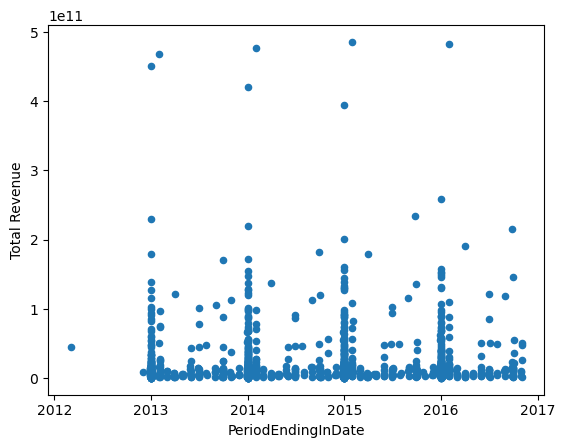

In [40]:
df_cleaned.plot(kind='scatter', x='PeriodEndingInDate', y='Total Revenue')

<AxesSubplot:xlabel='Income Tax', ylabel='Total Revenue'>

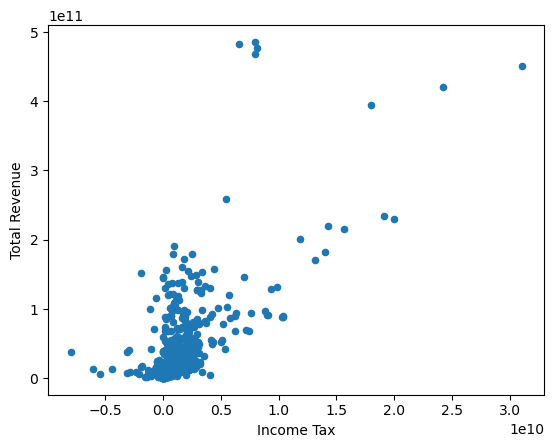

In [41]:
df_cleaned.plot(kind='scatter', x='Income Tax', y='Total Revenue')

In [42]:
#We've seen that the data is not uniformely distributed on time, we'll try firstly to analyse the data from the same day of different years
df_cleaned_dec2012 = df_cleaned.copy()[df_cleaned['PeriodEndingInDate']==('2012-12-31 00:00:00')]
df_cleaned_dec2013 = df_cleaned.copy()[df_cleaned['PeriodEndingInDate']==('2013-12-31 00:00:00')]
df_cleaned_dec2014 = df_cleaned.copy()[df_cleaned['PeriodEndingInDate']==('2014-12-31 00:00:00')]
df_cleaned_dec2015 = df_cleaned.copy()[df_cleaned['PeriodEndingInDate']==('2015-12-31 00:00:00')]

In [43]:
#checking that the data is not bad (date torresponds to year)
df_cleaned_dec2012bad = df_cleaned_dec2012.copy()[df_cleaned_dec2012['For Year']!=(2012)]
df_cleaned_dec2013bad = df_cleaned_dec2013.copy()[df_cleaned_dec2013['For Year']!=(2013)]
df_cleaned_dec2014bad = df_cleaned_dec2014.copy()[df_cleaned_dec2014['For Year']!=(2014)]
df_cleaned_dec2015bad = df_cleaned_dec2015.copy()[df_cleaned_dec2015['For Year']!=(2015)]

In [44]:
print(len(df_cleaned_dec2012bad),len(df_cleaned_dec2013bad),len(df_cleaned_dec2014bad),len(df_cleaned_dec2015bad))
#we've seen some bad lines, we will not trust them, will recalculate the df's to have only good ones

0 1 2 2


In [45]:
#cleaning these data
df_cleaned_dec2012 = df_cleaned_dec2012.copy()[df_cleaned_dec2012['For Year']==(2012)]
df_cleaned_dec2013 = df_cleaned_dec2013.copy()[df_cleaned_dec2013['For Year']==(2013)]
df_cleaned_dec2014 = df_cleaned_dec2014.copy()[df_cleaned_dec2014['For Year']==(2014)]
df_cleaned_dec2015 = df_cleaned_dec2015.copy()[df_cleaned_dec2015['For Year']==(2015)]

<AxesSubplot:xlabel='Income Tax', ylabel='Total Revenue'>

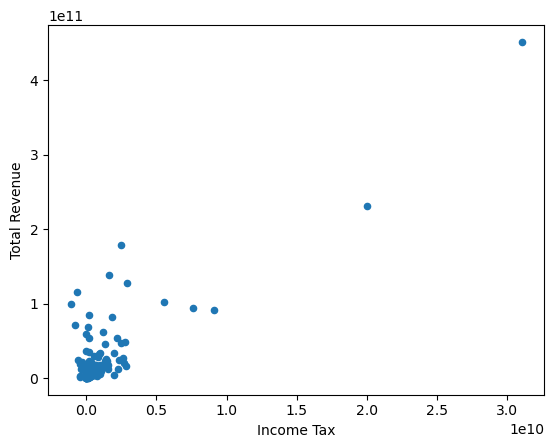

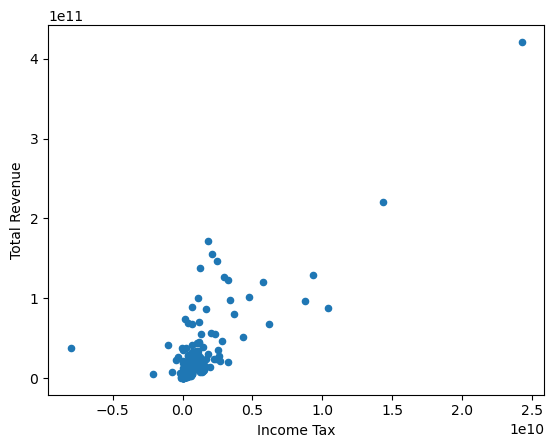

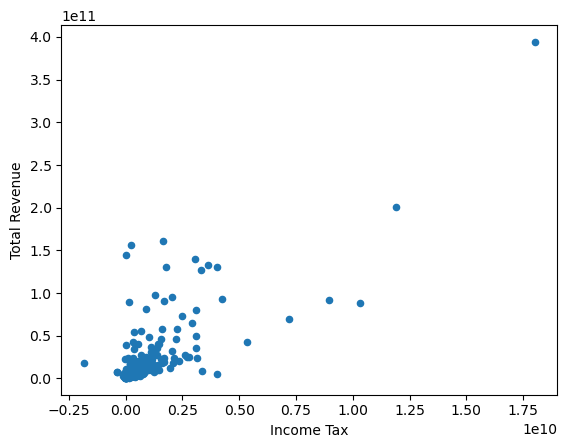

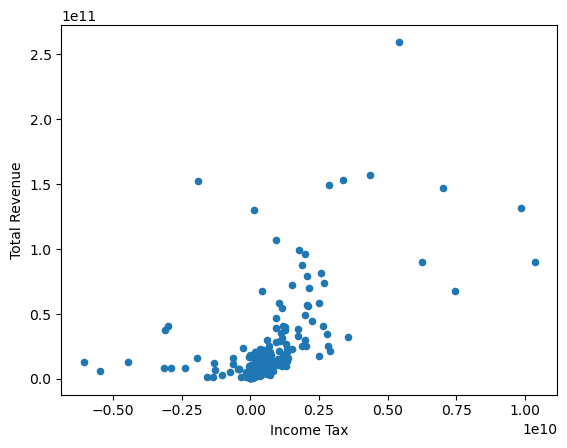

In [46]:
df_cleaned_dec2012.plot(kind='scatter', x='Income Tax', y='Total Revenue')
df_cleaned_dec2013.plot(kind='scatter', x='Income Tax', y='Total Revenue')
df_cleaned_dec2014.plot(kind='scatter', x='Income Tax', y='Total Revenue')
df_cleaned_dec2015.plot(kind='scatter', x='Income Tax', y='Total Revenue')

In [47]:
tickers = np.array(df_cleaned['Ticker Symbol'])
print(np.unique(tickers)) 
#see that too much different ones, hard to analyse separately, will look without them

['AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'ADSK'
 'AEE' 'AEP' 'AFL' 'AIG' 'AIV' 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE'
 'ALXN' 'AMAT' 'AME' 'AMG' 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON'
 'APA' 'APC' 'APD' 'APH' 'ARNC' 'ATVI' 'AVB' 'AVY' 'AWK' 'AXP' 'AYI' 'AZO'
 'BA' 'BAC' 'BAX' 'BBBY' 'BBT' 'BBY' 'BCR' 'BDX' 'BHI' 'BIIB' 'BK' 'BLL'
 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAG' 'CAH' 'CAT' 'CB' 'CBG' 'CCI' 'CCL'
 'CELG' 'CERN' 'CF' 'CFG' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CLX'
 'CMA' 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COL' 'COO' 'COST'
 'CPB' 'CRM' 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX'
 'CXO' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA'
 'DLPH' 'DLR' 'DLTR' 'DNB' 'DOV' 'DPS' 'DRI' 'DUK' 'DVA' 'DVN' 'EA' 'EBAY'
 'ECL' 'ED' 'EFX' 'EIX' 'EL' 'EMN' 'EMR' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES'
 'ESS' 'ETFC' 'ETN' 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'F' 'FAST' 'FB'
 'FBHS' 'FCX' 'FDX' 'FE' 'FFIV' 'FIS' 'FISV' 'FL' 'FLIR

In [48]:
df_cleaned_dec=pd.concat([df_cleaned_dec2012, df_cleaned_dec2013,df_cleaned_dec2014,df_cleaned_dec2015], axis=0)

In [49]:
df_cleaned_dec.head()

,Ticker Symbol,Period Ending,Cost of Revenue,Earnings Before Interest and Tax,Earnings Before Tax,Gross Profit,Income Tax,"Sales, General and Admin.",Total Current Liabilities,Total Revenue,For Year,PeriodEndingInDate
0,AAL,2012-12-31,1.049900e+10,-1.813000e+09,-2.445000e+09,1.435600e+10,-569000000.0,1.297700e+10,9.011000e+09,2.485500e+10,2012.0,2012-12-31
19,ABT,2012-12-31,8.899000e+09,1.000000e+08,-2.200000e+08,1.015100e+10,-457000000.0,6.735000e+09,1.328000e+10,1.905000e+10,2012.0,2012-12-31
33,ADS,2012-12-31,2.392091e+09,9.743640e+08,6.829040e+08,1.249299e+09,260648000.0,1.080590e+08,5.032777e+09,3.641390e+09,2012.0,2012-12-31
41,AEE,2012-12-31,3.477000e+09,1.221000e+09,8.290000e+08,2.304000e+09,307000000.0,4.430000e+08,2.686000e+09,5.781000e+09,2012.0,2012-12-31
45,AEP,2012-12-31,6.395000e+09,2.810000e+09,1.822000e+09,8.550000e+09,604000000.0,3.812000e+09,6.823000e+09,1.494500e+10,2012.0,2012-12-31


In [50]:
#checking the hypothesis about tickers
tickers = np.array(df_cleaned_dec['Ticker Symbol'])
print(np.unique(tickers)) 
#still too much, will not care about it

['AAL' 'ABBV' 'ABT' 'ADM' 'ADS' 'AEE' 'AEP' 'AFL' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE' 'ALXN' 'AME' 'AMG' 'AMGN' 'AMP' 'AMT'
 'AMZN' 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APH' 'ARNC' 'ATVI' 'AVB' 'AWK'
 'AXP' 'BA' 'BAC' 'BAX' 'BBT' 'BCR' 'BHI' 'BIIB' 'BK' 'BLL' 'BMY' 'BSX'
 'BWA' 'BXP' 'C' 'CAT' 'CB' 'CBG' 'CCI' 'CELG' 'CF' 'CFG' 'CHD' 'CHK'
 'CHRW' 'CHTR' 'CI' 'CINF' 'CL' 'CMA' 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP'
 'COF' 'COG' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD' 'DFS'
 'DGX' 'DHR' 'DISCA' 'DLPH' 'DLR' 'DNB' 'DOV' 'DPS' 'DUK' 'DVA' 'DVN'
 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'EMN' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES' 'ESS'
 'ETFC' 'ETN' 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'F' 'FAST' 'FB' 'FBHS'
 'FCX' 'FE' 'FIS' 'FISV' 'FLIR' 'FLR' 'FLS' 'FMC' 'FRT' 'FSLR' 'FTR' 'GD'
 'GILD' 'GLW' 'GM' 'GPC' 'GT' 'GWW' 'HAL' 'HBAN' 'HCA' 'HCN' 'HCP' 'HES'
 'HIG' 'HOG' 'HON' 'HST' 'HSY' 'HUM' 'IBM' 'IDXX' 'IFF' 'IP' 'IPG' 'IRM'
 'ISRG' 'ITW' 'IVZ' 'JBHT' 'JNPR' 'JPM' 'KIM' 'KMB' 'KMI' 'K

In [51]:
df_cleaned_dec.columns

Index(['Ticker Symbol', 'Period Ending', 'Cost of Revenue',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Gross Profit', 'Income Tax', 'Sales, General and Admin.',
       'Total Current Liabilities', 'Total Revenue', 'For Year',
       'PeriodEndingInDate'],
      dtype='object')

In [52]:
df_cleaned_for_lastaysoftheyear = df_cleaned_dec.copy().drop('Ticker Symbol', axis=1)

In [53]:
#don't care about date anymore, only the year matters
df_cleaned_for_lastaysoftheyear = df_cleaned_for_lastaysoftheyear.copy().drop('Period Ending', axis=1)
df_cleaned_for_lastaysoftheyear = df_cleaned_for_lastaysoftheyear.copy().drop('PeriodEndingInDate', axis=1)

In [54]:
df_cleaned_for_lastaysoftheyear

,Cost of Revenue,Earnings Before Interest and Tax,Earnings Before Tax,Gross Profit,Income Tax,"Sales, General and Admin.",Total Current Liabilities,Total Revenue,For Year
0,1.049900e+10,-1.813000e+09,-2.445000e+09,1.435600e+10,-569000000.0,1.297700e+10,9.011000e+09,2.485500e+10,2012.0
19,8.899000e+09,1.000000e+08,-2.200000e+08,1.015100e+10,-457000000.0,6.735000e+09,1.328000e+10,1.905000e+10,2012.0
33,2.392091e+09,9.743640e+08,6.829040e+08,1.249299e+09,260648000.0,1.080590e+08,5.032777e+09,3.641390e+09,2012.0
41,3.477000e+09,1.221000e+09,8.290000e+08,2.304000e+09,307000000.0,4.430000e+08,2.686000e+09,5.781000e+09,2012.0
45,6.395000e+09,2.810000e+09,1.822000e+09,8.550000e+09,604000000.0,3.812000e+09,6.823000e+09,1.494500e+10,2012.0
...,...,...,...,...,...,...,...,...,...
1587,2.249000e+09,4.580000e+08,4.030000e+08,1.404000e+09,63000000.0,8.540000e+08,8.230000e+08,3.653000e+09,2015.0
1591,2.077748e+09,-4.813176e+09,-4.813176e+09,2.890553e+09,-89598000.0,1.768522e+09,1.277380e+09,4.968301e+09,2015.0
1599,1.800600e+09,4.398000e+08,1.532000e+08,4.197200e+09,7000000.0,2.291900e+09,1.617900e+09,5.997800e+09,2015.0
1603,4.934400e+07,5.207260e+08,4.518590e+08,0.000000e+00,142388000.0,1.591239e+09,0.000000e+00,2.210591e+09,2015.0


In [55]:
#we save the obtained data in order to not be lost with our big data

df_cleaned.to_csv('CleanedFundamentals-only31stdecembers.csv') 

## Task3 - Method Chaining and writing Python programs

In [60]:
import project_functions3 as p3
df=p3.load_and_process('../data/raw/fundamentals.csv')
df

,Ticker Symbol,Cost of Revenue,Earnings Before Interest and Tax,Earnings Before Tax,Gross Profit,Income Tax,"Sales, General and Admin.",Total Current Liabilities,Total Revenue,For Year
0,AAL,1.049900e+10,-1.813000e+09,-2.445000e+09,1.435600e+10,-569000000.0,1.297700e+10,9.011000e+09,2.485500e+10,2012.0
20,ABT,8.899000e+09,1.000000e+08,-2.200000e+08,1.015100e+10,-457000000.0,6.735000e+09,1.328000e+10,1.905000e+10,2012.0
36,ADS,2.392091e+09,9.743640e+08,6.829040e+08,1.249299e+09,260648000.0,1.080590e+08,5.032777e+09,3.641390e+09,2012.0
44,AEE,3.477000e+09,1.221000e+09,8.290000e+08,2.304000e+09,307000000.0,4.430000e+08,2.686000e+09,5.781000e+09,2012.0
48,AEP,6.395000e+09,2.810000e+09,1.822000e+09,8.550000e+09,604000000.0,3.812000e+09,6.823000e+09,1.494500e+10,2012.0
...,...,...,...,...,...,...,...,...,...,...
1760,XYL,2.249000e+09,4.580000e+08,4.030000e+08,1.404000e+09,63000000.0,8.540000e+08,8.230000e+08,3.653000e+09,2015.0
1764,YHOO,2.077748e+09,-4.813176e+09,-4.813176e+09,2.890553e+09,-89598000.0,1.768522e+09,1.277380e+09,4.968301e+09,2015.0
1772,ZBH,1.800600e+09,4.398000e+08,1.532000e+08,4.197200e+09,7000000.0,2.291900e+09,1.617900e+09,5.997800e+09,2015.0
1776,ZION,4.934400e+07,5.207260e+08,4.518590e+08,0.000000e+00,142388000.0,1.591239e+09,0.000000e+00,2.210591e+09,2015.0


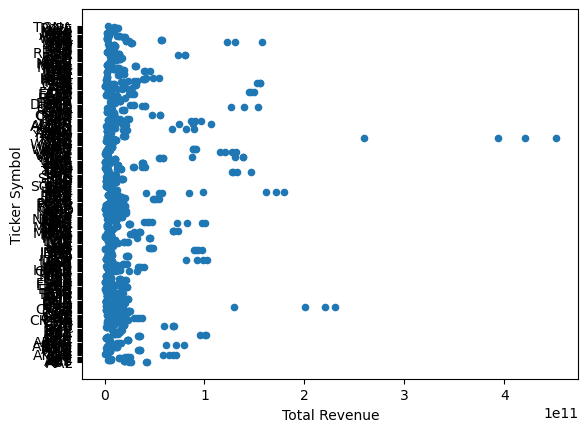

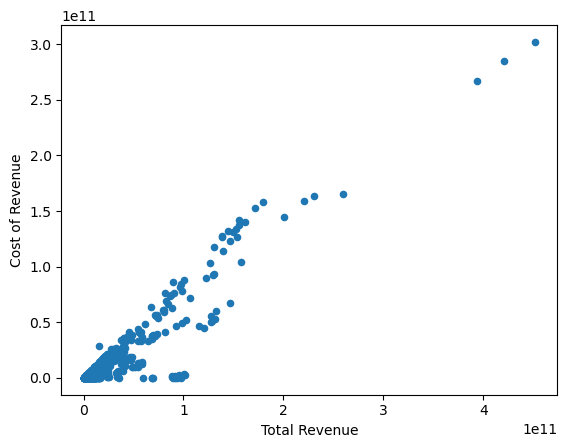

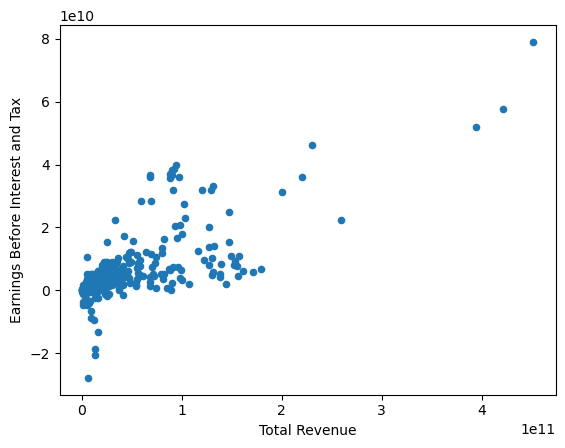

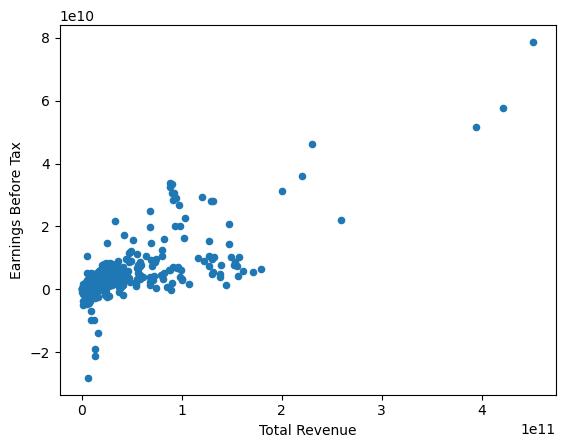

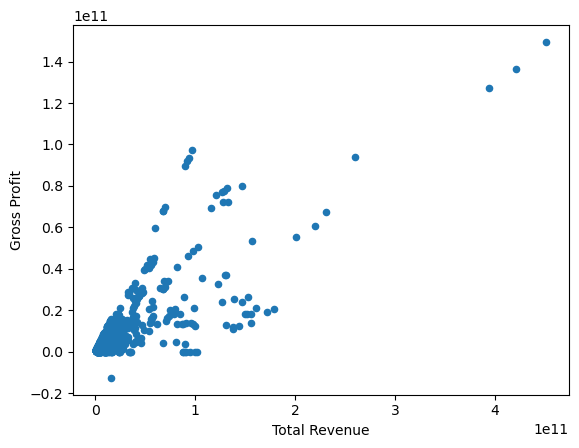

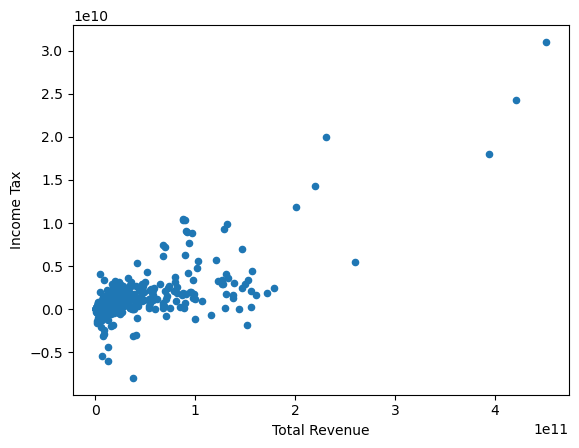

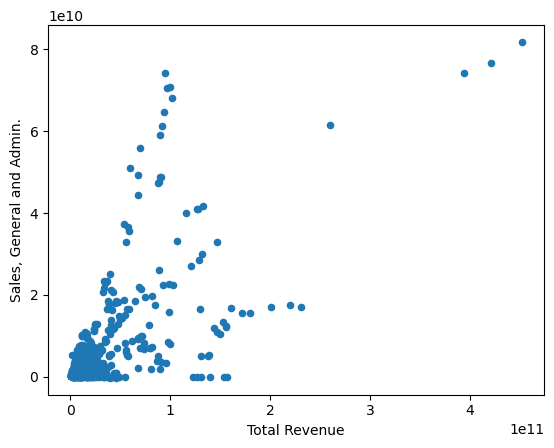

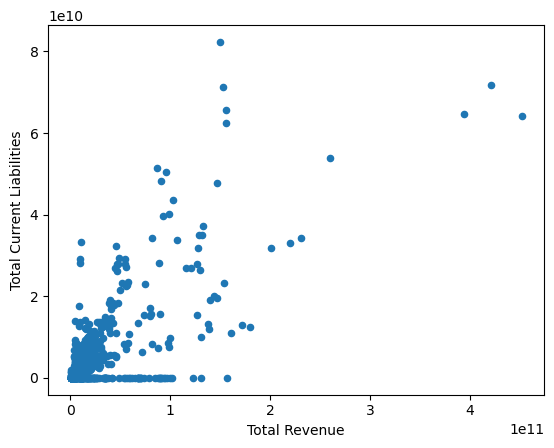

In [61]:
#For now we are looking only for studied variable, 'Total Revenue'

relevant_features_in_list=df.columns.tolist()
relevant_features_in_list.remove('For Year') #here there are no correlation
relevant_features_in_list.remove('Total Revenue') #we don't need to compare with the same


for a in relevant_features_in_list:
    df.plot(kind='scatter', x='Total Revenue', y=a)

In [62]:
tonotstury=relevant_features_in_list.copy()
tonotstury.remove('Cost of Revenue')
tonotstury.remove('Ticker Symbol')

In [63]:
tonotstury

['Earnings Before Interest and Tax',
 'Earnings Before Tax',
 'Gross Profit',
 'Income Tax',
 'Sales, General and Admin.',
 'Total Current Liabilities']

In [64]:
df2 = df.copy().drop(tonotstury, axis=1)

In [65]:
df2

,Ticker Symbol,Cost of Revenue,Total Revenue,For Year
0,AAL,1.049900e+10,2.485500e+10,2012.0
20,ABT,8.899000e+09,1.905000e+10,2012.0
36,ADS,2.392091e+09,3.641390e+09,2012.0
44,AEE,3.477000e+09,5.781000e+09,2012.0
48,AEP,6.395000e+09,1.494500e+10,2012.0
...,...,...,...,...
1760,XYL,2.249000e+09,3.653000e+09,2015.0
1764,YHOO,2.077748e+09,4.968301e+09,2015.0
1772,ZBH,1.800600e+09,5.997800e+09,2015.0
1776,ZION,4.934400e+07,2.210591e+09,2015.0


In [66]:
df2['Ratio'] = df['Cost of Revenue'] / df['Total Revenue']

In [67]:
df2

,Ticker Symbol,Cost of Revenue,Total Revenue,For Year,Ratio
0,AAL,1.049900e+10,2.485500e+10,2012.0,0.422410
20,ABT,8.899000e+09,1.905000e+10,2012.0,0.467139
36,ADS,2.392091e+09,3.641390e+09,2012.0,0.656917
44,AEE,3.477000e+09,5.781000e+09,2012.0,0.601453
48,AEP,6.395000e+09,1.494500e+10,2012.0,0.427902
...,...,...,...,...,...
1760,XYL,2.249000e+09,3.653000e+09,2015.0,0.615658
1764,YHOO,2.077748e+09,4.968301e+09,2015.0,0.418201
1772,ZBH,1.800600e+09,5.997800e+09,2015.0,0.300210
1776,ZION,4.934400e+07,2.210591e+09,2015.0,0.022322


<AxesSubplot:xlabel='Total Revenue', ylabel='Ratio'>

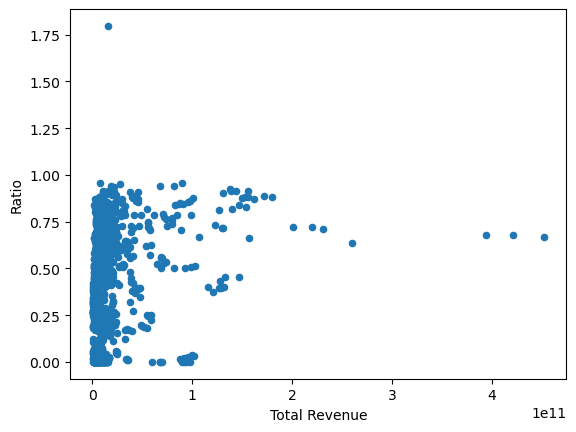

In [68]:
df2.plot(kind='scatter', x='Total Revenue', y='Ratio')

<AxesSubplot:xlabel='Ticker Symbol', ylabel='Ratio'>

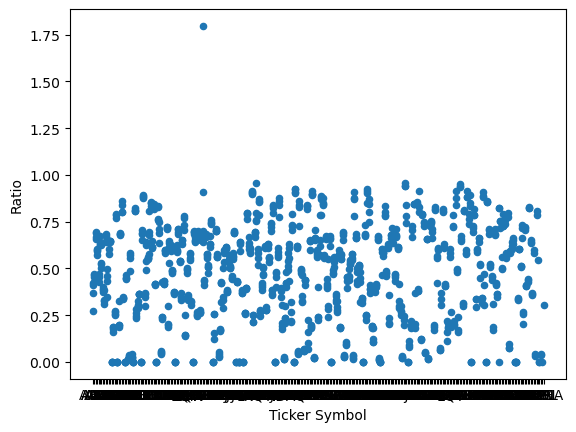

In [69]:
df2.plot(kind='scatter', x='Ticker Symbol', y='Ratio')

<AxesSubplot:xlabel='Ticker Symbol', ylabel='Total Revenue'>

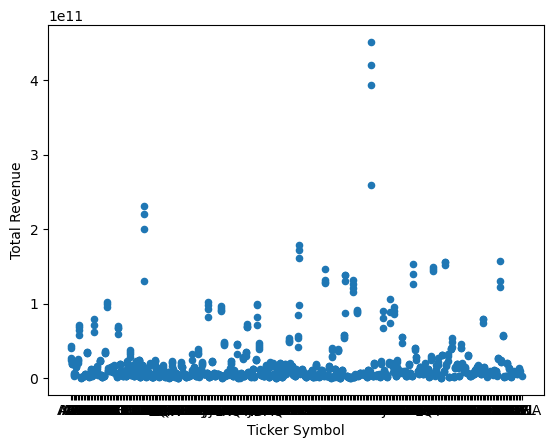

In [70]:
df2.plot(kind='scatter', x='Ticker Symbol', y='Total Revenue')

In [71]:
tickers = np.array(df2['Ticker Symbol'])
unique, counts = np.unique(tickers, return_counts=True)
dict(zip(unique, counts))

{'AAL': 4,
 'ABBV': 3,
 'ABT': 4,
 'ADM': 3,
 'ADS': 4,
 'AEE': 4,
 'AEP': 3,
 'AFL': 4,
 'AIG': 4,
 'AIV': 4,
 'AIZ': 3,
 'AJG': 3,
 'AKAM': 4,
 'ALB': 4,
 'ALK': 4,
 'ALL': 4,
 'ALLE': 2,
 'ALXN': 3,
 'AME': 4,
 'AMG': 4,
 'AMGN': 3,
 'AMP': 4,
 'AMT': 4,
 'AMZN': 3,
 'AN': 3,
 'ANTM': 3,
 'AON': 4,
 'APA': 4,
 'APC': 3,
 'APH': 4,
 'ARNC': 4,
 'ATVI': 4,
 'AVB': 4,
 'AWK': 4,
 'AXP': 4,
 'BA': 3,
 'BAC': 3,
 'BAX': 4,
 'BBT': 4,
 'BCR': 3,
 'BHI': 3,
 'BIIB': 3,
 'BK': 4,
 'BLL': 4,
 'BMY': 4,
 'BSX': 4,
 'BWA': 3,
 'BXP': 4,
 'C': 4,
 'CAT': 3,
 'CB': 4,
 'CBG': 4,
 'CCI': 4,
 'CELG': 3,
 'CF': 4,
 'CFG': 2,
 'CHD': 4,
 'CHK': 4,
 'CHRW': 4,
 'CHTR': 3,
 'CI': 4,
 'CINF': 4,
 'CL': 4,
 'CMA': 3,
 'CME': 4,
 'CMG': 3,
 'CMI': 3,
 'CMS': 3,
 'CNC': 4,
 'CNP': 4,
 'COF': 4,
 'COG': 4,
 'CTL': 4,
 'CTSH': 4,
 'CTXS': 3,
 'CVS': 3,
 'CVX': 4,
 'CXO': 4,
 'D': 4,
 'DAL': 3,
 'DD': 3,
 'DFS': 3,
 'DGX': 4,
 'DHR': 4,
 'DISCA': 3,
 'DLPH': 3,
 'DLR': 4,
 'DNB': 4,
 'DOV': 3,
 'DPS': 3,
 'D

<AxesSubplot:xlabel='For Year', ylabel='Ratio'>

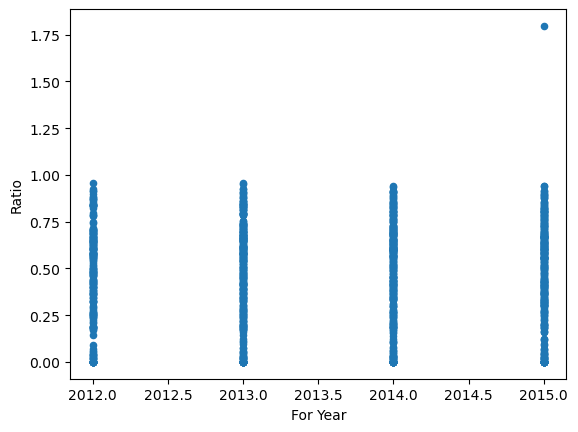

In [72]:
df2.plot(kind='scatter', x='For Year', y='Ratio')

In [73]:
df2_2012 = df2.copy()[df2['For Year']==2012]
df2_2013 = df2.copy()[df2['For Year']==2013]
df2_2014 = df2.copy()[df2['For Year']==2014]
df2_2015 = df2.copy()[df2['For Year']==2015]

<AxesSubplot:xlabel='Total Revenue', ylabel='Ratio'>

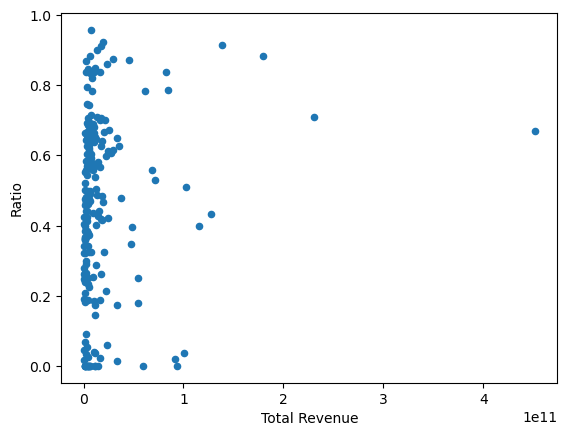

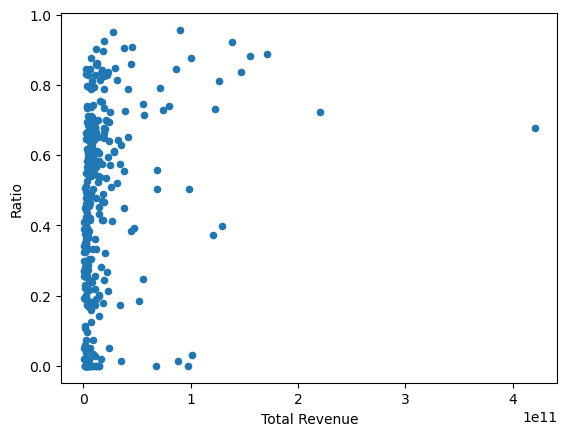

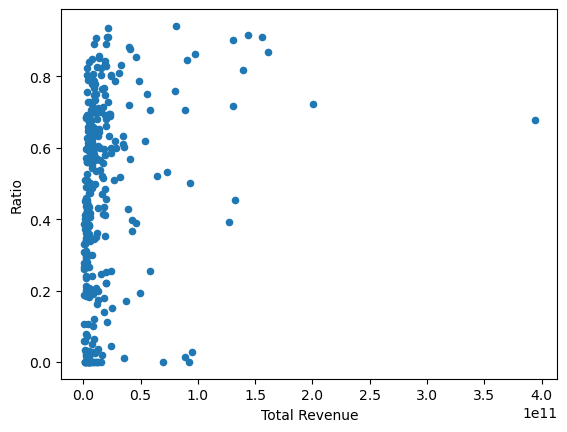

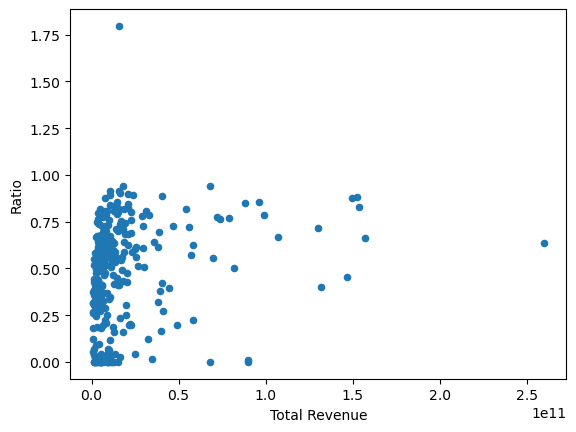

In [74]:
df2_2012.plot(kind='scatter', x='Total Revenue', y='Ratio')
df2_2013.plot(kind='scatter', x='Total Revenue', y='Ratio')
df2_2014.plot(kind='scatter', x='Total Revenue', y='Ratio')
df2_2015.plot(kind='scatter', x='Total Revenue', y='Ratio')